# Laboratorio de regresión lineal

|                |   |
:----------------|---|
| **Nombre**     |HUGO ERNESTO CARDENAS ALCARAZ   |
| **Fecha**      | 25/09/2024  |
| **Expediente** |   744893 |   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [27]:
import pandas as pd
tabla = pd.read_csv("Advertising.csv")
tabla

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Si, parece ser que el presupuesto en publicidad en radio, tiene la influencia más grande en las ventas finales, 

Los índices más altos en ventas, tienen los índices más altos en publicidad de radio, siguido también por s publicidad en TV, parecen ser los factores más cruciales

Si no hubiera relación, no podría ser analizado, sería random.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Parece ser fuerte, se denota unaalta diferencia entre los que invierten mucho en publicidad de radio y los que no tanto. Siguiendo así, la diferencia de publicidad de TV, dentro de los que invierten mucho en publicidad de radio

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Parecer ser que invertir solo en uno no es conveniente ya que radio aún se ve viable, pero si destaca el hecho de que peridódico es casi obsoleto, comparando la hilera 1 con la 40, que en TV y radio son muy similares, podemos ver que tomó más de doble en periódico para subir la venta un 0.6, por ello no valdría la pena. Consideraría invertir solamente en radio y TV. TV parece por mucho el más eficiente; comparando la gilera 131 y 137, se nota el cambio de casi 8 puntos en ventas, por 25 aumentados de TV.

Sería confiable predecirlo, considerando que ya es un patrón con 200 ejemplos.

La relación es lineal, debido a que es una proporción directa, si sube la inversión, suben las ventas.

Pareciera que hay sinergía entr TV y radio al ir incrementando.


## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventas futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [5]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

TV = pd.read_csv("Advertising.csv",usecols=["TV"])
VENTAS = pd.read_csv("Advertising.csv",usecols = ["sales"])


n = len(VENTAS)
ones = np.ones([n,1])
X = np.hstack((ones,TV))
y = np.reshape(VENTAS,[200,1])
beta = np.random.rand(2)
y_prediccion = X @ beta  
def func_costo(beta,X,y): 
    beta = np.reshape(beta,[2,1])
    y_prediccion = X @ beta   
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0,0]
f = opt.minimize(func_costo,beta,args=(X,y))
f

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2102.530583132557
        x: [ 7.033e+00  4.754e-02]
      nit: 4
      jac: [ 0.000e+00 -3.052e-05]
 hess_inv: [[ 1.014e-02 -5.159e-05]
            [-5.159e-05  3.486e-07]]
     nfev: 110
     njev: 36

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [7]:
TVavg = pd.read_csv("Advertising.csv",usecols=["TV"]).mean()
VENTASavg = pd.read_csv("Advertising.csv",usecols = ["sales"]).mean()
tvEVOL = np.reshape(TV,200)
yEVOL = np.reshape(VENTAS,200)
def beta_uno():
    suma1= 0
    suma2= 0
    for i in range (n):
        suma_uno = (tvEVOL[i]-TVavg.iloc[0])*(yEVOL[i]-VENTASavg.iloc[0])
        suma_unodos = (tvEVOL[i]-TVavg.iloc[0])**2
        suma1 += suma_uno
        suma2 += suma_unodos
    return suma1/suma2
        
beta1 = beta_uno()

def beta_cero():
    for i in range (200):
        beta_cero = (VENTASavg.iloc[0])-(beta1*TVavg.iloc[0])
        
    return beta_cero
beta0 = beta_cero()

betas = "Con fórmula : "+ str(beta0) + "  "+str(beta1)
efes = "Con regresión : "+ str(f.x[0]) + "  "+ str(f.x[1])
betas, efes

('Con fórmula : 7.032593549127704  0.04753664043301969',
 'Con regresión : 7.032597726468651  0.04753661176574212')

Son iguales en sus primeros digitos, pero va perdiendo precisión

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

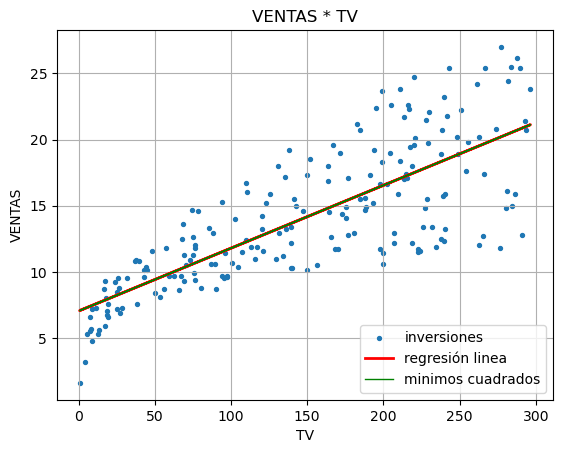

In [9]:
plt.figure()
plt.scatter(TV,VENTAS, label =("inversiones"), s=8)
plt.grid()
plt.ylabel("VENTAS")
plt.xlabel("TV")
plt.title("VENTAS * TV")
plt.plot(TV,f.x[0] + f.x[1]*TV,"r",linewidth = 2,label=("regresión linea"))
plt.plot(TV,beta0 + beta1*TV,"g", linewidth= 1,label= ("minimos cuadrados"))
plt.legend(loc=("lower right"))

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

**la población es la totalidad de dondese extrae un "pedazo" que es la muestra.**



¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

**Una muestra de ella puede tener cesgos, por lo que tiene un margen de error ya que no cubre el espectro completo con la TOTALIDAD  de excepciones.**

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.


Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [95]:
rss = f.fun
rss
sigmasqr = rss/(n-2)

def SE_beta1_cuad():
    SE_beta1 = 0
    for i in range(n):
        SE_beta1 += (tvEVOL[i]-TVavg.iloc[0])**2
    return SE_beta1

sumatoria = SE_beta1_cuad()

SE_beta_uno = np.sqrt(sigmasqr/sumatoria)

dentro = ((1/n) + ((TVavg.iloc[0])**2/sumatoria))
SE_beta_cero = np.sqrt(sigmasqr*(1/n) + (dentro))

SE_beta_cero,SE_beta_uno
#0.26

(0.26987887098671887, 0.002690607187797641)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [93]:
#IC : intervalo de confianza
ICBeta0_sup = beta0 + 2*SE_beta_cero
ICBeta0_inf = beta0 - 2*SE_beta_cero

ICBeta1_sup = beta1 + 2*SE_beta_uno
ICBeta1_inf = beta1 - 2*SE_beta_uno

print("intervalos de Beta 0, inferior: "+ str(ICBeta0_inf) +" superior: "+ str(ICBeta0_sup))
print("intervalos de Beta 1, inferior: "+ str(ICBeta1_inf) +" superior: "+ str(ICBeta1_sup))



intervalos de Beta 0, inferior: 6.492835807154266 superior: 7.572351291101142
intervalos de Beta 1, inferior: 0.04215542605742441 superior: 0.05291785480861497


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula es establecer la falta de relación en presencia de una $(\beta_1=0)$ directamente, donde directamente se relaciona el 0 con no tener; no obstante, la hipótesis alternativa consiste en establecer una relación con respecto a $\beta_1 $, cuando $(\beta_1 \neq 0)$

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [109]:
#Utilizando prueba de hipótesis nula

t1 = (beta1-0)/SE_beta_uno
t2= (beta0-0)/SE_beta_cero
print("en beta0: "+ str(t2))
print("en beta1: "+ str(t1))
print("Resultando números grandes")

en beta0: 26.058333219697616
en beta1: 17.667625600870466
Resultando números grandes


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [107]:
from scipy import stats

p_beta1 = 2*(1 - stats.t.cdf(np.abs(t1), n-2))

p_beta0 = 2*(1 - stats.t.cdf(np.abs(t2), n-2))

p_beta1, p_beta0

(0.0, 0.0)


¿Se rechaza la hipótesis nula? ¿Qué significa?

Para $\beta_1 $ se tiene un *p_value* considerable, aunque para $\beta_0 $ se tiene un valor diminuto por lo que es menos del 5% y se puede rechazar la hipótesis nula para $\beta_0 $. Indicando que es muy poco probable y que prácticamente no exsite relación entre predictor y respuesta.

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [113]:
def tss():
    tss = 0
    for i in range(n):
        tss += (yEVOL[i]-VENTASavg.iloc[0])**2
    return tss
tss= tss()
Rcuad = (1-(rss/tss))
Rcuad

0.6118750508498483

In [456]:
VASE= 1-Rcuad
print("Queda : "+ str(VASE) + " de varianza sin explicar")

Queda : 0.3881249491501517 de varianza sin explicar


Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

# REGRESIÓN LINEAL VENTAS * RADIO

## COEFICIENTES ESTIMADOS (V*R)

In [117]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

RAD = pd.read_csv("Advertising.csv",usecols=["radio"])
VENTAS = pd.read_csv("Advertising.csv",usecols = ["sales"])


n = len(VENTAS)
ones = np.ones([n,1])
X2 = np.hstack((ones,RAD))
y2 = np.reshape(VENTAS,[200,1])
beta2 = np.random.rand(2)
y_prediccion2 = X2 @ beta2  
def func_costo2(beta2,X2,y2): 
    beta2 = np.reshape(beta2,[2,1])
    y_prediccion2 = X2 @ beta2   
    error2 = y_prediccion2 - y2
    rss2 = error2.T @ error2
    return rss2[0,0]
f2 = opt.minimize(func_costo2,beta2,args=(X2,y2))


RADavg = pd.read_csv("Advertising.csv",usecols=["radio"]).mean()
VENTASavg = pd.read_csv("Advertising.csv",usecols = ["sales"]).mean()
radEVOL = np.reshape(RAD,200)
yEVOL = np.reshape(VENTAS,200)
def beta_uno2():
    suma12= 0
    suma22= 0
    for i in range (n):
        suma_uno2 = (radEVOL[i]-RADavg.iloc[0])*(yEVOL[i]-VENTASavg.iloc[0])
        suma_unodos2 = (radEVOL[i]-RADavg.iloc[0])**2
        suma12 += suma_uno2
        suma22 += suma_unodos2
    return suma12/suma22
        
beta12 = beta_uno2()

def beta_cero2():
    for i in range (n):
        beta_cero2 = (VENTASavg.iloc[0])-(beta12*RADavg.iloc[0])
        
    return beta_cero2
beta02 = beta_cero2()

betas2 = "Con fórmula : "+ str(beta02) + "  "+str(beta12)
efes2 = "Con regresión : "+ str(f2.x[0]) + "  "+ str(f2.x[1])
betas2, efes2



('Con fórmula : 9.311638095158287  0.20249578339243954',
 'Con regresión : 9.311638817165495  0.20249575384941934')

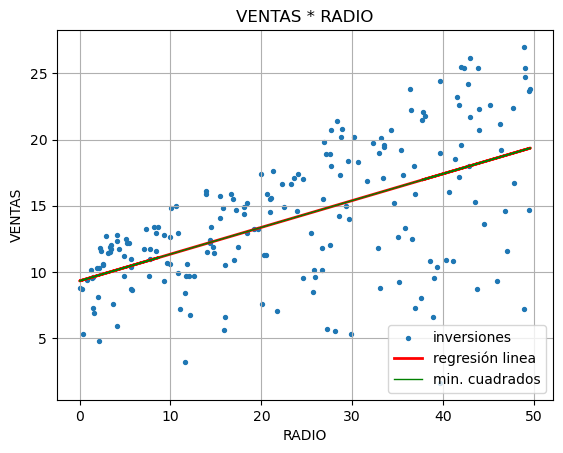

In [119]:
plt.figure()
plt.scatter(RAD,VENTAS, label =("inversiones"), s=8)
plt.grid()
plt.ylabel("VENTAS")
plt.xlabel("RADIO")
plt.title("VENTAS * RADIO")
plt.plot(RAD,f2.x[0] + f2.x[1]*RAD,"r",linewidth = 2,label=("regresión linea"))
plt.plot(RAD,beta02 + beta12*RAD,"g", linewidth= 1,label= ("min. cuadrados"))
plt.legend(loc=("lower right"))

## SE coeficientes (V*R)

In [133]:
rss2 = f2.fun
rss2
sigmasqr2 = rss2/(n-2)

def SE_beta1_cuad2():
    SE_beta12 = 0
    for i in range(n):
        SE_beta12 += (radEVOL[i]-RADavg.iloc[0])**2
    return SE_beta12

sumatoria2 = SE_beta1_cuad2()

SE_beta_uno2 = (sigmasqr2/sumatoria2)**(1/2)


SE_beta_cero2 = (sigmasqr2*((1/n) + ((TVavg.iloc[0])**2/sumatoria2)))**(1/2)

SE_beta_uno2, SE_beta_cero2

(0.020411306360090743, 3.016513650975361)

## INTERVALOS DE CONFIANZA (V*R)

In [135]:
#IC : intervalo de confianza
ICBeta0_sup2 = beta02 + 2*SE_beta_cero2 
ICBeta0_inf2 = beta02 - 2*SE_beta_cero2

ICBeta1_sup2 = beta12 + 2*SE_beta_uno2
ICBeta1_inf2 = beta12 - 2*SE_beta_uno2

print("intervalos de Beta 1, inferior: "+ str(ICBeta1_inf2) +" superior: "+ str(ICBeta1_sup2))
print("intervalos de Beta 0, inferior: "+ str(ICBeta0_inf2) +" superior: "+ str(ICBeta0_sup2))


intervalos de Beta 1, inferior: 0.16167317067225806 superior: 0.24331839611262102
intervalos de Beta 0, inferior: 3.278610793207565 superior: 15.344665397109008


## T-STATS (V*R)

In [137]:
#Utilizando prueba de hipótesis nula

t12 = (beta12-0)/SE_beta_uno2
t22= (beta02-0)/SE_beta_cero2
print("en beta0: "+ str(t22))
print("en beta1: "+ str(t12))
print("no es 0")

en beta0: 3.0868874378033917
en beta1: 9.9207654728249
no es 0


## P-VALUES (V*R)

In [139]:
from scipy import stats
p_beta12 = 2*(1 - stats.t.cdf(np.abs(t12), n-2))
p_beta02 = 2*(1 - stats.t.cdf(np.abs(t22), n-2))

p_beta12,p_beta02



(0.0, 0.002312520033069587)

## OBSERVACIONES (V*R)

In [129]:
def tss2():
    tss2 = 0
    for i in range(n):
        tss2 += (yEVOL[i]-VENTASavg.iloc[0])**2
    return tss2
tss2= tss2()
Rcuad2 = (1-(rss2/tss2))
VASE2 = 1-Rcuad2
print("Queda : "+ str(VASE2) + " sin explicar")

Queda : 0.6679675445547122 sin explicar


# REGRESIÓN LINEAL VENTAS * PERIÓDICO

# COEFICIENTES ESTIMADOS V * P

## Regresión lineal múltiple

In [183]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

PER = pd.read_csv("Advertising.csv",usecols=["newspaper"])
VENTAS = pd.read_csv("Advertising.csv",usecols = ["sales"])


n = len(VENTAS)
ones = np.ones([n,1])
X3 = np.hstack((ones,PER))
y3 = np.reshape(VENTAS,[200,1])
beta3 = np.random.rand(2)
y_prediccion3 = X3 @ beta3  
def func_costo3(beta3,X3,y3): 
    beta3 = np.reshape(beta3,[2,1])
    y_prediccion3 = X3 @ beta3   
    error3= y_prediccion3 - y3
    rss3 = error3.T @ error3
    return rss3[0,0]
f3 = opt.minimize(func_costo3,beta3,args=(X3,y3))


PERavg = pd.read_csv("Advertising.csv",usecols=["newspaper"]).mean()
VENTASavg = pd.read_csv("Advertising.csv",usecols = ["sales"]).mean()
perEVOL = np.reshape(PER,200)
yEVOL = np.reshape(VENTAS,200)
def beta_uno3():
    suma13= 0
    suma23= 0
    for i in range (n):
        suma_uno3 = (perEVOL[i]-PERavg.iloc[0])*(yEVOL[i]-VENTASavg.iloc[0])
        suma_unodos3 = (perEVOL[i]-PERavg.iloc[0])**2
        suma13 += suma_uno3
        suma23 += suma_unodos3
    return suma13/suma23
        
beta13 = beta_uno3()

def beta_cero3():
    for i in range (n):
        beta_cero3 = (VENTASavg.iloc[0])-(beta13*PERavg.iloc[0])
        
    return beta_cero3
beta03 = beta_cero3()

betas3 = "Con fórmula : "+ str(beta03) + "  "+str(beta13)
efes3 = "Con regresión : "+ str(f3.x[0]) + "  "+ str(f3.x[1])
betas3, efes3

('Con fórmula : 12.351407069278162  0.05469309847227332',
 'Con regresión : 12.351407549703124  0.05469308061488499')

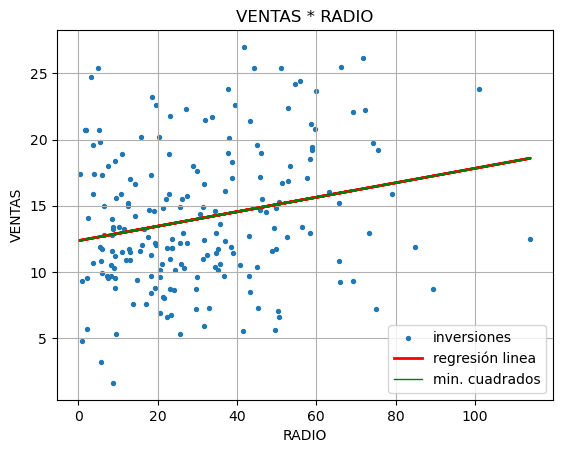

In [185]:
plt.figure()
plt.scatter(PER,VENTAS, label =("inversiones"), s=8)
plt.grid()
plt.ylabel("VENTAS")
plt.xlabel("RADIO")
plt.title("VENTAS * RADIO")
plt.plot(PER,f3.x[0] + f3.x[1]*PER,"r",linewidth = 2,label=("regresión linea"))
plt.plot(PER,beta03 + beta13*PER,"g", linewidth= 1,label= ("min. cuadrados"))
plt.legend(loc=("lower right"))

SE Coeficientes V * P

In [187]:
rss3 = f3.fun
rss3
sigmasqr3 = rss3/(n-2)

def SE_beta1_cuad3():
    SE_beta13 = 0
    for i in range(n):
        SE_beta13 += (perEVOL[i]-PERavg.iloc[0])**2
    return SE_beta13

sumatoria3 = SE_beta1_cuad3()

SE_beta_uno3 = np.sqrt(sigmasqr3/sumatoria3)

dentro3 = ((1/n) + ((PERavg.iloc[0])**2/sumatoria3))
SE_beta_cero3 = np.sqrt(sigmasqr3*(1/n) + (dentro3))

SE_beta_cero3,SE_beta_uno3

(0.3802070150113328, 0.01657572187635821)

### INTERVALOS DE CONFIANZA

In [189]:
#IC : intervalo de confianza
ICBeta0_sup3 = beta03 + 2*SE_beta_cero3 
ICBeta0_inf3 = beta03 - 2*SE_beta_cero3

ICBeta1_sup3 = beta13 + 2*SE_beta_uno3
ICBeta1_inf3 = beta13 - 2*SE_beta_uno3

print("intervalos de Beta 1, inferior: "+ str(ICBeta1_inf3) +" superior: "+ str(ICBeta1_sup3))
print("intervalos de Beta 0, inferior: "+ str(ICBeta0_inf3) +" superior: "+ str(ICBeta0_sup3))

intervalos de Beta 1, inferior: 0.0215416547195569 superior: 0.08784454222498975
intervalos de Beta 0, inferior: 11.590993039255496 superior: 13.111821099300828


### T-STATS (V*P)

In [191]:
#Utilizando prueba de hipótesis nula

t13 = (beta13-0)/SE_beta_uno3
t23= (beta03-0)/SE_beta_cero3
print("en beta0: "+ str(t23))
print("en beta1: "+ str(t13))
print("no es 0")

en beta0: 32.486005206689846
en beta1: 3.299590743633407
no es 0


### P-VALUES (V*P)

In [193]:
from scipy import stats
p_beta13 = 2*(1 - stats.t.cdf(np.abs(t13), n-2))
p_beta03 = 2*(1 - stats.t.cdf(np.abs(t23), n-2))

p_beta13,p_beta03

(0.0011481958688883687, 0.0)

### OBSERVACIONES V*P

In [195]:
def tss3():
    tss3 = 0
    for i in range(n):
        tss3 += (yEVOL[i]-VENTASavg.iloc[0])**2
    return tss3
tss3= tss3()
Rcuad3 = (1-(rss3/tss3))
VASE3 = 1-Rcuad3
print("Queda : "+ str(VASE3) + " sin explicar")

Queda : 0.9478795545557012 sin explicar


En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

## MINIMIZE FOR BETA-VALUES

In [440]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

TV = pd.read_csv("Advertising.csv",usecols=["TV"])
PER = pd.read_csv("Advertising.csv",usecols=["newspaper"])
RAD = pd.read_csv("Advertising.csv",usecols=["radio"])
VENTAS = pd.read_csv("Advertising.csv",usecols = ["sales"])


n = len(VENTAS)
ones = np.ones([n,1])
X4 = np.hstack((ones,TV,RAD,PER))
y4 = np.reshape(VENTAS,[n,1])
n,p = X4.shape

beta4 = np.random.rand(p, 1)
beta4 = np.reshape(beta4,p)

def func_costo4(beta4,X4,y4): 
    y_prediccion4 = X4 @ beta4   
    error4 = y_prediccion4 - y4
    rss4 = error4.T @ error4
    return rss4[0,0]
    
f4 = opt.minimize(func_costo4,beta4,args=(X4,y4))

f4

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5417.148750000473
        x: [ 9.121e-01 -2.881e-02  1.944e-01  1.791e-01]
      nit: 1
      jac: [-7.324e-04  1.642e-02 -1.910e-02 -2.856e-02]
 hess_inv: [[ 1.000e+00 -3.889e-03 -6.389e-04 -1.170e-03]
            [-3.889e-03  1.051e-01 -1.470e-01 -2.691e-01]
            [-6.389e-04 -1.470e-01  9.758e-01 -4.421e-02]
            [-1.170e-03 -2.691e-01 -4.421e-02  9.191e-01]]
     nfev: 177
     njev: 33

Calcula el RSS y RSE.

In [442]:
RSS4 = f4.fun

RSE4 = np.sqrt(rss/(n-2))
print("rss4 : " + str(RSS4) + ", rse4 : " + str(RSE4))

rss4 : 5417.148750000473, rse4 : 3.2586563686513967


## BETAS

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

In [444]:
var_beta = np.linalg.inv(X4.T @ X4) * RSE4**2

std_beta = np.sqrt(var_beta.diagonal())
var_beta

array([[ 3.63636909e-01, -9.93231553e-04, -4.16945935e-03,
        -2.20911010e-03],
       [-9.93231553e-04,  7.27274620e-06, -1.67093723e-06,
        -1.22074186e-06],
       [-4.16945935e-03, -1.67093723e-06,  2.77169252e-04,
        -6.65349006e-05],
       [-2.20911010e-03, -1.22074186e-06, -6.65349006e-05,
         1.28836779e-04]])

In [336]:
std_beta

array([0.60302314, 0.0026968 , 0.0166484 , 0.01135063])

In [446]:
beta_cero4 = f4.x[0]
beta_uno4 = f4.x[1]
beta_dos4 = f4.x[2]
beta_tres4 = f4.x[3]

## T-STATS

Calcula los estadísticos t y *p-values* de tus estimaciones.

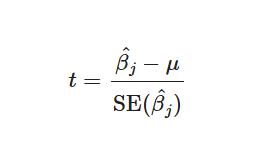

In [448]:
t4_cero = (beta_cero4 - 0)/std_beta[0]
t4_uno = (beta_uno4 - 0)/std_beta[1]
t4_dos = (beta_dos4 - 0)/std_beta[2]
t4_tres = (beta_tres4 - 0)/std_beta[3]

In [347]:
t4_cero, t4_uno, t4_dos, t4_tres

(4.873601033630604, 16.96995191047346, 11.324211217049415, -0.0914051457426927)

## P-VALUES

In [450]:

from scipy import stats

p_b4_cero = 2*(1 - stats.t.cdf(np.abs(t4_cero), n-2))
p_b4_uno = 2*(1 - stats.t.cdf(np.abs(t4_uno), n-2))
p_b4_dos = 2*(1 - stats.t.cdf(np.abs(t4_dos), n-2))
p_b4_tres = 2*(1 - stats.t.cdf(np.abs(t4_tres), n-2))

p_b4_cero, p_b4_uno, p_b4_dos, p_b4_tres



(0.13198787046724836, 0.0, 0.0, 0.0)

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

**A diferencia de una regresion lineal simple, en una regresión lineal múltiple, se puede tener variaciones ya que al involucrar tantos factores, algunos poseen prioridad, por lo que los que tienen baja relevancia, sus variaciones (en este caso donde sus $p(B)$ no es cero), son "sacrificables" para que las más relevantes puedan ajustarse al modelo.**



## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3